In [1]:
import os
import cv2
import copy
import time
import tqdm
import warnings
import matplotlib
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

## Reading train data

In [3]:
path_folder = 'C:\\Users\\HP\\Downloads\\computervition_project\\archive (2)\\TRAIN'

size = 124
data_trian = []
label_train = []
for folder in tqdm.tqdm(os.listdir(path_folder)):
      for files in tqdm.tqdm(os.listdir(os.path.join(path_folder, folder))):
            if files.endswith('jpg'):
                label_train.append(folder)
                img_path = os.path.join(path_folder, folder, files)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                im = cv2.resize(img, (size, size))
                data_trian.append(im)

  3%|██▌                                                                          | 418/12565 [00:03<01:46, 114.30it/s]


 10%|███████▌                                                                    | 1241/12565 [00:10<01:31, 123.40it/s]


 17%|████████████▋                                                               | 2102/12565 [00:17<01:27, 119.57it/s]


 24%|██████████████████▏                                                          | 2962/12565 [00:25<01:37, 98.15it/s]


 31%|███████████████████████▏                                                    | 3836/12565 [00:32<01:09, 126.10it/s]


 37%|████████████████████████████▍                                               | 4711/12565 [00:39<01:05, 119.79it/s]


 45%|█████████████████████████████████▊                                          | 5593/12565 [00:46<00:57, 120.99it/s]


 51%|███████████████████████████████████████                                     | 6458/12565 [00:53<00:49, 123.78it/s]


 58%|████████████████████████████████████████████▍                               | 7337/12565 [01:00<00:41, 125.75it/s]


 65%|█████████████████████████████████████████████████▍                          | 8176/12565 [01:07<00:35, 124.69it/s]


 72%|██████████████████████████████████████████████████████▋                     | 9049/12565 [01:14<00:29, 119.05it/s]


 79%|███████████████████████████████████████████████████████████▉                | 9910/12565 [01:22<00:22, 120.27it/s]


 86%|████████████████████████████████████████████████████████████████▎          | 10771/12565 [01:29<00:15, 118.84it/s]


 93%|█████████████████████████████████████████████████████████████████████▍     | 11631/12565 [01:36<00:07, 116.87it/s]


 99%|██████████████████████████████████████████████████████████████████████████▌| 12501/12565 [01:43<00:00, 118.80it/s]


  8%|██████                                                                        | 784/9999 [00:06<01:22, 111.48it/s]


 17%|████████████▊                                                                | 1666/9999 [00:13<01:08, 121.15it/s]


 25%|███████████████████▌                                                         | 2533/9999 [00:20<01:00, 122.46it/s]


 34%|██████████████████████████▎                                                  | 3411/9999 [00:28<00:52, 124.90it/s]


 43%|████████████████████████████████▉                                            | 4280/9999 [00:35<00:49, 115.89it/s]


 51%|███████████████████████████████████████▋                                     | 5146/9999 [00:42<00:39, 122.76it/s]


 60%|██████████████████████████████████████████████▍                              | 6027/9999 [00:49<00:33, 119.63it/s]


 69%|█████████████████████████████████████████████████████                        | 6887/9999 [00:56<00:26, 116.90it/s]


 77%|███████████████████████████████████████████████████████████▍                 | 7713/9999 [01:03<00:19, 116.33it/s]


 86%|██████████████████████████████████████████████████████████████████           | 8575/9999 [01:11<00:11, 125.81it/s]


 94%|████████████████████████████████████████████████████████████████████████▋    | 9431/9999 [01:18<00:04, 122.31it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:14<00:00, 64.76s/it]


In [4]:
data_trian = np.array(data_trian)
label_train = np.array(label_train)
print("the shape of the train data", data_trian.shape)
print("the shape of the train lable", label_train.shape)
print("the values in the trian lables ", np.unique(label_train))

the shape of the train data (22659, 124, 124, 3)
the shape of the train lable (22659,)
the values in the trian lables  ['E' 'O' 'R']


## Reading test data

In [5]:
path_folder = 'C:\\Users\\HP\\Downloads\\computervition_project\\archive (2)\\TEST'

size = 124
data_test = []
label_test = []
for folder in tqdm.tqdm(os.listdir(path_folder)):
      for files in tqdm.tqdm(os.listdir(os.path.join(path_folder, folder))):
            if files.endswith('jpg'):
                label_test.append(folder)
                img_path = os.path.join(path_folder, folder, files)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                im = cv2.resize(img, (size, size))
                data_test.append(im)

 52%|████████████████████████████████████████▋                                     | 731/1401 [00:06<00:05, 113.20it/s]


  8%|██████▏                                                                        | 87/1112 [00:00<00:10, 102.49it/s]


 71%|███████████████████████████████████████████████████████▎                      | 789/1112 [00:08<00:02, 119.09it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.04s/it]


In [6]:
data_test = np.array(data_test)
label_test = np.array(label_test)
print("the shape of the test data", data_test.shape)
print("the shape of the test lable", label_test.shape)
print("the values in the test lables ", np.unique(label_test))

the shape of the test data (2532, 124, 124, 3)
the shape of the test lable (2532,)
the values in the test lables  ['E' 'O' 'R']


## Percentage Distribution of Data Sets

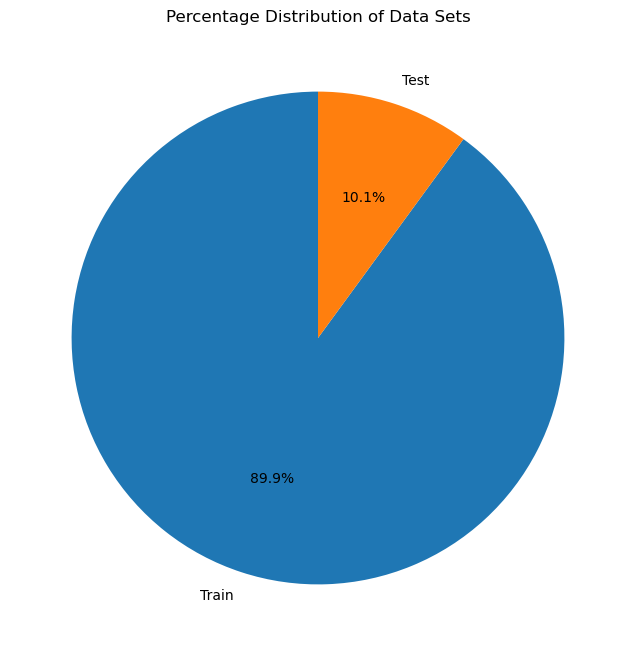

In [7]:
total_samples = len(label_test) + len(label_train)

percentage_train = (len(label_train) / total_samples) * 100
percentage_test = (len(label_test) / total_samples) * 100

labels = ['Train', 'Test']
percentages = [percentage_train, percentage_test]

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Data Sets')

plt.show()

## Show a sample of the images

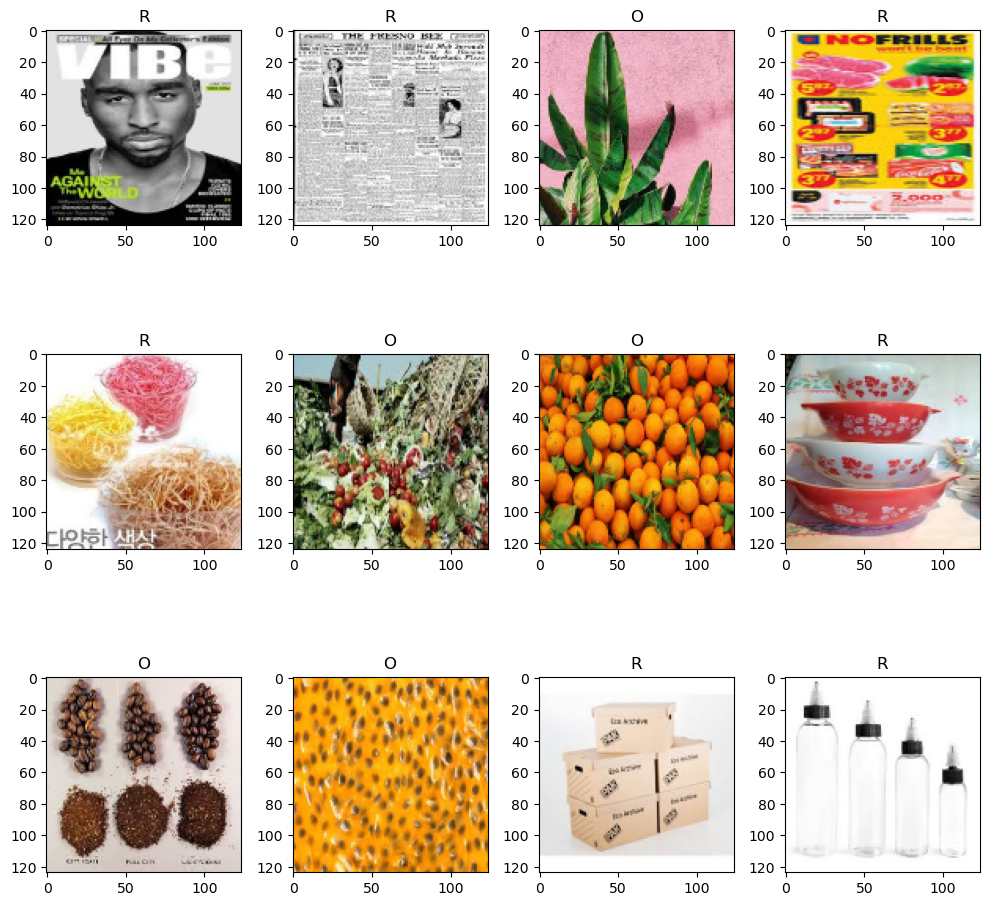

In [8]:
row=3
col=4
fig, ax = plt.subplots(row, col)
fig.set_size_inches(10, 10)
for r in range(row):
    for c in range(col):
        rnd = np.random.randint(0, len(data_trian))
        ax[r, c].imshow(cv2.cvtColor(data_trian[rnd], cv2.COLOR_BGR2RGB))
        ax[r, c].set_title(f'{label_train[rnd]}')
plt.tight_layout()

## show the label's distribution among train and test

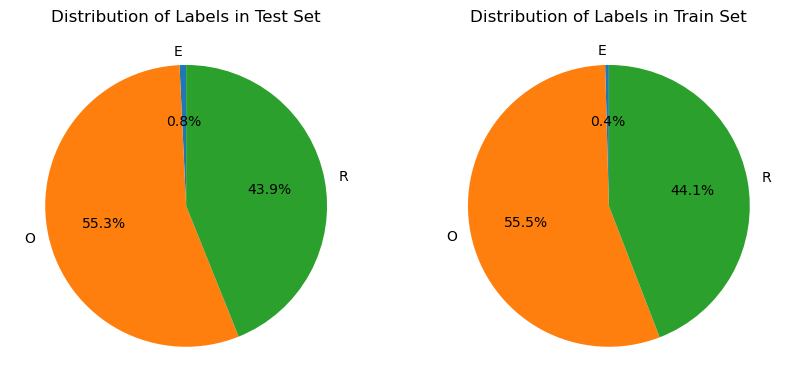

In [9]:
# Count unique labels in test and train sets
unique_labels_test, counts_test = np.unique(label_test, return_counts=True)
unique_labels_train, counts_train = np.unique(label_train, return_counts=True)

# Plot pie chart for test set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(counts_test, labels=unique_labels_test, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels in Test Set')

# Plot pie chart for train set
plt.subplot(1, 2, 2)
plt.pie(counts_train, labels=unique_labels_train, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels in Train Set')

plt.show()


## Normalizing data

In [10]:
data_trian = data_trian.astype('float32') / 255

In [11]:
data_test = data_test.astype('float32') / 255

## Label encoding

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
label_train = label_encoder.fit_transform(label_train)
label_test = label_encoder.fit_transform(label_test)

## One-Hot Encoding

In [14]:
from keras.utils import to_categorical
label_train_one_hot = to_categorical(label_train, num_classes=3)
label_test_one_hot = to_categorical(label_test, num_classes=3)

## Split Train into Train and Validation
using 0.2 of the train for the validation

In [15]:
from sklearn.model_selection import train_test_split

data_train, x_val, y_train, y_val = train_test_split(data_trian, label_train_one_hot, test_size=0.2, random_state=42)


## Show the label's distribution among train, Validation and test


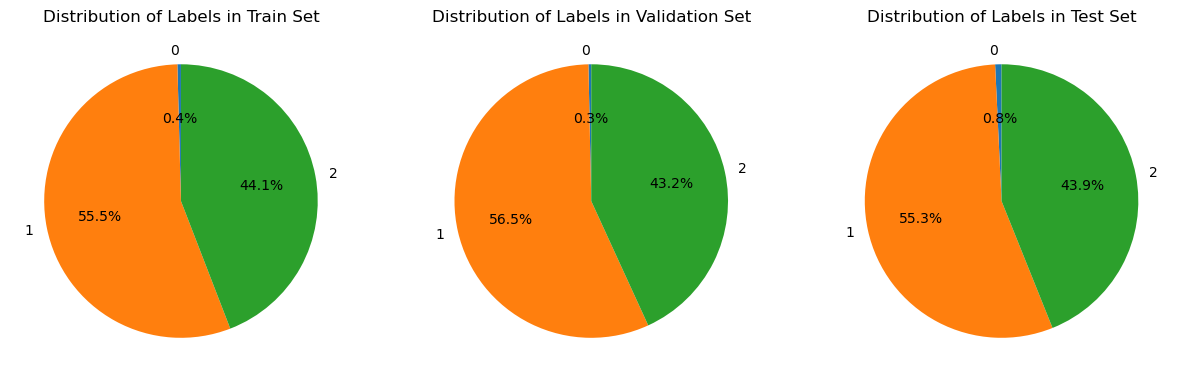

In [16]:
# Count unique labels in train, validation, and test sets
counts_train = np.sum(label_train_one_hot, axis=0)
counts_val = np.sum(y_val, axis=0)
counts_test = np.sum(label_test_one_hot, axis=0)

# Plot pie chart for train set
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(counts_train, labels=np.arange(len(counts_train)), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels in Train Set')

# Plot pie chart for validation set
plt.subplot(1, 3, 2)
plt.pie(counts_val, labels=np.arange(len(counts_val)), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels in Validation Set')

# Plot pie chart for test set
plt.subplot(1, 3, 3)
plt.pie(counts_test, labels=np.arange(len(counts_test)), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels in Test Set')

plt.show()

## Percentage Distribution of Data Sets

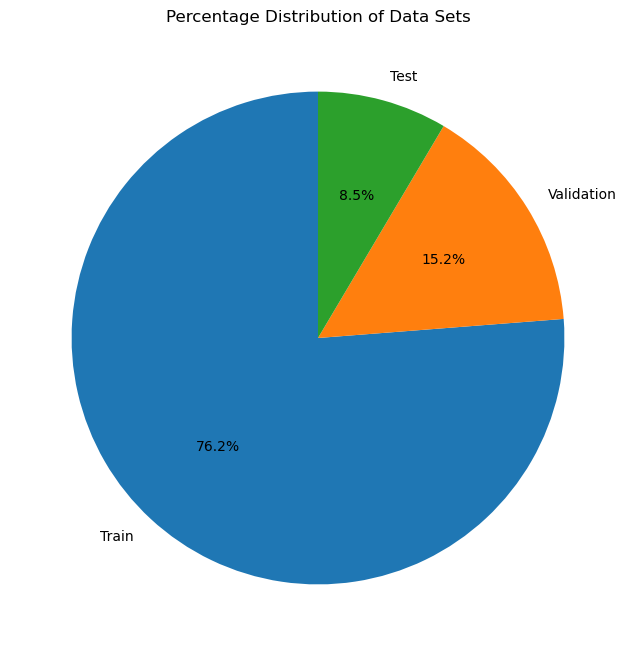

In [17]:
total_samples = len(label_train_one_hot) + len(y_val) + len(label_test_one_hot)

# Calculate percentages for train, validation, and test sets
percentage_train = (len(label_train_one_hot) / total_samples) * 100
percentage_val = (len(y_val) / total_samples) * 100
percentage_test = (len(label_test_one_hot) / total_samples) * 100

labels = ['Train', 'Validation', 'Test']
percentages = [percentage_train, percentage_val, percentage_test]

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Data Sets')

plt.show()

## Model using VGG16 and 10 epochs

In [19]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(124, 124, 3))

In [20]:
model = tf.keras.models.Sequential()
model.add(vgg)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
vgg.trainable=False

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 15895363 (60.64 MB)
Trainable params: 1180675 (4.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [41]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 124, 124, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 124, 124, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 62, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 62, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 62, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 31, 31, 128)       0     

In [23]:
history = model.fit(
    data_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_val,y_val)  
)

Epoch 1/10


567/567 [==============================] - 1261s 2s/step - loss: 0.3336 - accuracy: 0.8695 - val_loss: 0.2901 - val_accuracy: 0.8824
Epoch 2/10
567/567 [==============================] - 1194s 2s/step - loss: 0.2355 - accuracy: 0.9059 - val_loss: 0.3179 - val_accuracy: 0.8722
Epoch 3/10
567/567 [==============================] - 1191s 2s/step - loss: 0.1913 - accuracy: 0.9239 - val_loss: 0.2830 - val_accuracy: 0.8932
Epoch 4/10
567/567 [==============================] - 1187s 2s/step - loss: 0.1525 - accuracy: 0.9425 - val_loss: 0.2861 - val_accuracy: 0.9011
Epoch 5/10
567/567 [==============================] - 1187s 2s/step - loss: 0.1158 - accuracy: 0.9548 - val_loss: 0.3131 - val_accuracy: 0.8970
Epoch 6/10
567/567 [==============================] - 1188s 2s/step - loss: 0.0831 - accuracy: 0.9695 - val_loss: 0.3454 - val_accuracy: 0.8952
Epoch 7/10
567/567 [==============================] - 1191s 2s/step - loss: 0.0542 - accuracy: 0.9816 - val_loss: 0.3829 - val_accurac

## learning curves (Train acc, and Val acc)

[]

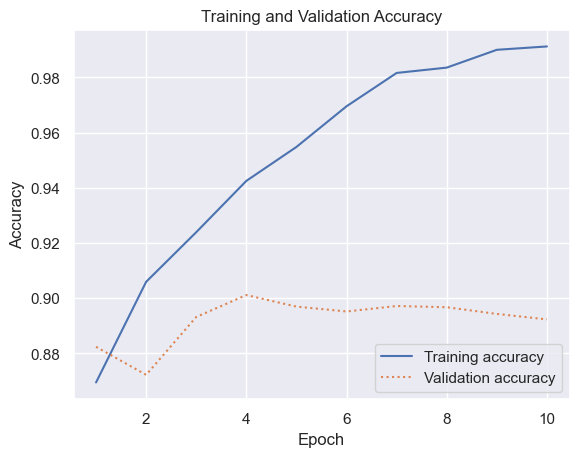

In [42]:
#plot the learning curves (Train acc, and Val acc)
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## learning curves (Train loss, and Val loss)  

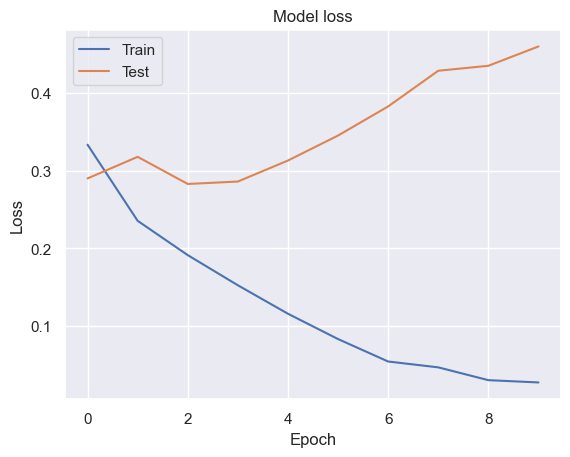

In [43]:
#plot the learning curves (Train loss, and Val loss)       
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [26]:
model.save('my_model16.h5', save_format = 'h5')

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model using VGG16 and 15 epochs

In [27]:
vgg1=VGG16(include_top=False,weights='imagenet',input_shape=(124, 124, 3))
model1 = tf.keras.models.Sequential()
model1.add(vgg1)
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dense(3, activation='softmax'))
vgg1.trainable=False

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(
    data_train,
    y_train,
    batch_size=32,
    epochs=15,
    validation_data=(x_val,y_val))

Epoch 1/15
567/567 [==============================] - 1249s 2s/step - loss: 0.3222 - accuracy: 0.8726 - val_loss: 0.2876 - val_accuracy: 0.8861
Epoch 2/15
567/567 [==============================] - 1191s 2s/step - loss: 0.2370 - accuracy: 0.9069 - val_loss: 0.2789 - val_accuracy: 0.8923
Epoch 3/15
567/567 [==============================] - 1198s 2s/step - loss: 0.1909 - accuracy: 0.9231 - val_loss: 0.2831 - val_accuracy: 0.8910
Epoch 4/15
567/567 [==============================] - 1195s 2s/step - loss: 0.1493 - accuracy: 0.9423 - val_loss: 0.2747 - val_accuracy: 0.8961
Epoch 5/15
567/567 [==============================] - 1198s 2s/step - loss: 0.1145 - accuracy: 0.9554 - val_loss: 0.3378 - val_accuracy: 0.8919
Epoch 6/15
567/567 [==============================] - 1196s 2s/step - loss: 0.0820 - accuracy: 0.9684 - val_loss: 0.3153 - val_accuracy: 0.8945
Epoch 7/15
567/567 [==============================] - 1197s 2s/step - loss: 0.0539 - accuracy: 0.9808 - val_loss: 0.3892 - val_accuracy:

In [52]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1179904   
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 15895363 (60.64 MB)
Trainable params: 1180675 (4.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [28]:
model1.save('my_model16EPO15.h5', save_format = 'h5')

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## learning curves (Train acc, and Val acc)

[]

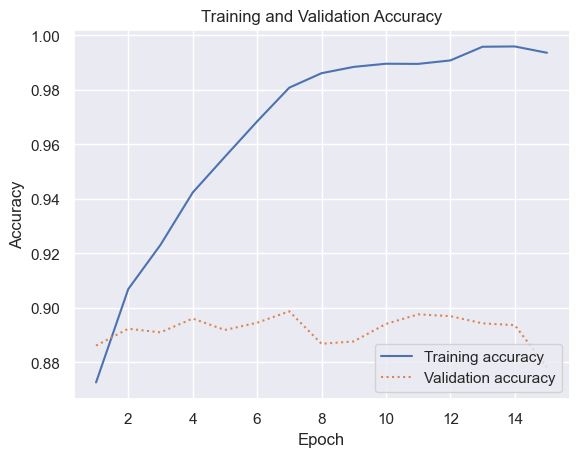

In [44]:
#plot the learning curves (Train acc, and Val acc)
acc = history1.history['accuracy']
val = history1.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

##  learning curves (Train loss, and Val loss)  

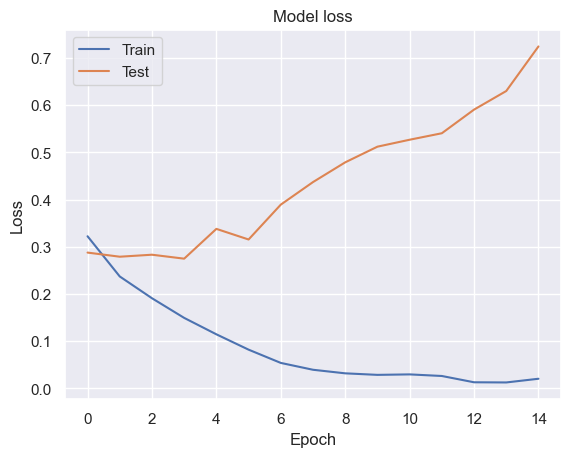

In [45]:
#plot the learning curves (Train loss, and Val loss)    
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Model using VGG19 and 15 epochs

In [31]:
vgg19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(124, 124, 3), pooling='avg')

model2 = tf.keras.models.Sequential()
model2.add(vgg19)
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
vgg19.trainable=False

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    data_train,
    y_train,
    batch_size=32,
    epochs=15,
    validation_data=(x_val,y_val))

Epoch 1/15
567/567 [==============================] - 1566s 3s/step - loss: 0.3500 - accuracy: 0.8645 - val_loss: 0.3494 - val_accuracy: 0.8625
Epoch 2/15
567/567 [==============================] - 1507s 3s/step - loss: 0.2890 - accuracy: 0.8875 - val_loss: 0.3031 - val_accuracy: 0.8857
Epoch 3/15
567/567 [==============================] - 1509s 3s/step - loss: 0.2644 - accuracy: 0.8952 - val_loss: 0.2867 - val_accuracy: 0.8886
Epoch 4/15
567/567 [==============================] - 1509s 3s/step - loss: 0.2462 - accuracy: 0.9032 - val_loss: 0.3020 - val_accuracy: 0.8813
Epoch 5/15
567/567 [==============================] - 1510s 3s/step - loss: 0.2275 - accuracy: 0.9104 - val_loss: 0.2959 - val_accuracy: 0.8831
Epoch 6/15
567/567 [==============================] - 1506s 3s/step - loss: 0.2105 - accuracy: 0.9149 - val_loss: 0.2796 - val_accuracy: 0.8890
Epoch 7/15
567/567 [==============================] - 1520s 3s/step - loss: 0.2004 - accuracy: 0.9218 - val_loss: 0.2741 - val_accuracy:

In [46]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 124, 124, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 124, 124, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 62, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 62, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 62, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 31, 31, 128)       0     

In [47]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 20156483 (76.89 MB)
Trainable params: 132099 (516.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [39]:
model2.save('my_model19EPO152.h5', save_format = 'h5')

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##  learning curves (Train acc, and Val acc)

[]

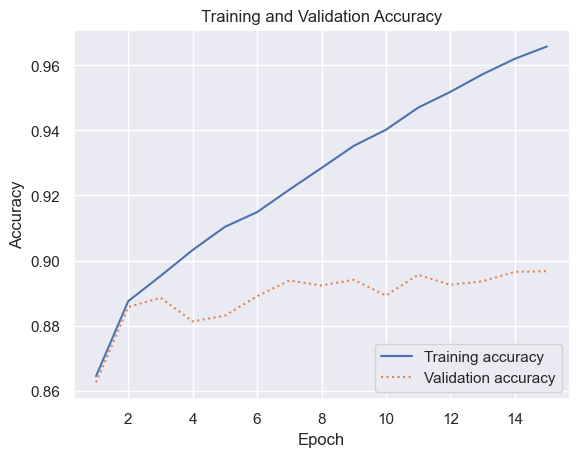

In [48]:
#plot the learning curves (Train acc, and Val acc)
acc = history2.history['accuracy']
val = history2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## learning curves (Train loss, and Val loss)

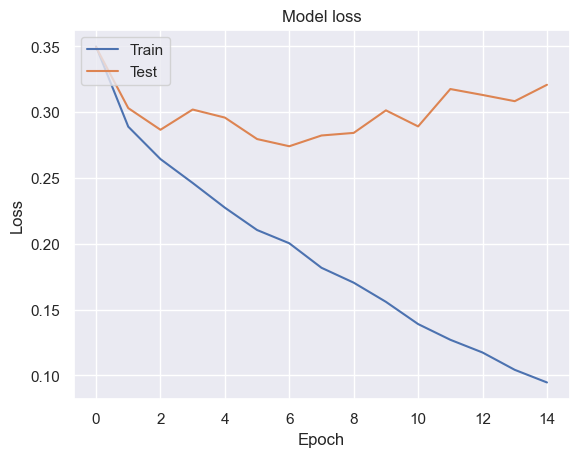

In [34]:
#plot the learning curves (Train loss, and Val loss)
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Model using VGG19 and 10 epochs

In [35]:
vgg191 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(124, 124, 3), pooling='avg')

model3 = tf.keras.models.Sequential()
model3.add(vgg191)
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dense(3, activation='softmax'))
vgg191.trainable=False

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(
    data_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_val,y_val))

Epoch 1/10
567/567 [==============================] - 4639s 8s/step - loss: 0.3525 - accuracy: 0.8638 - val_loss: 0.3258 - val_accuracy: 0.8714
Epoch 2/10
567/567 [==============================] - 1560s 3s/step - loss: 0.2926 - accuracy: 0.8854 - val_loss: 0.3469 - val_accuracy: 0.8594
Epoch 3/10
567/567 [==============================] - 1763s 3s/step - loss: 0.2655 - accuracy: 0.8955 - val_loss: 0.2937 - val_accuracy: 0.8861
Epoch 4/10
567/567 [==============================] - 1735s 3s/step - loss: 0.2479 - accuracy: 0.9005 - val_loss: 0.2862 - val_accuracy: 0.8881
Epoch 5/10
567/567 [==============================] - 1561s 3s/step - loss: 0.2323 - accuracy: 0.9085 - val_loss: 0.3132 - val_accuracy: 0.8804
Epoch 6/10
567/567 [==============================] - 1493s 3s/step - loss: 0.2157 - accuracy: 0.9128 - val_loss: 0.3140 - val_accuracy: 0.8791
Epoch 7/10
567/567 [==============================] - 1484s 3s/step - loss: 0.2020 - accuracy: 0.9195 - val_loss: 0.2710 - val_accuracy:

## learning curves (Train acc, and Val acc)

[]

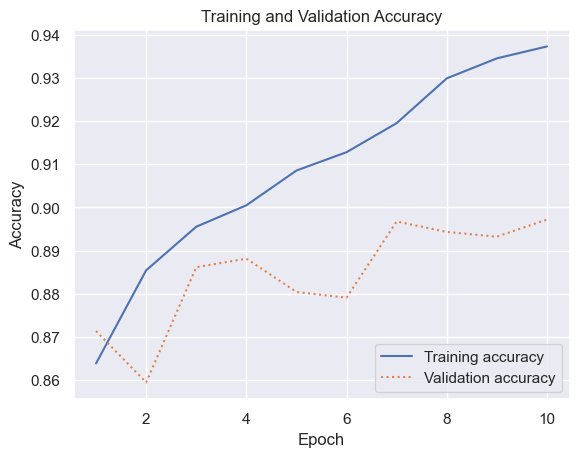

In [49]:
#plot the learning curves (Train acc, and Val acc)
acc = history3.history['accuracy']
val = history3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

##  learning curves (Train loss, and Val loss)

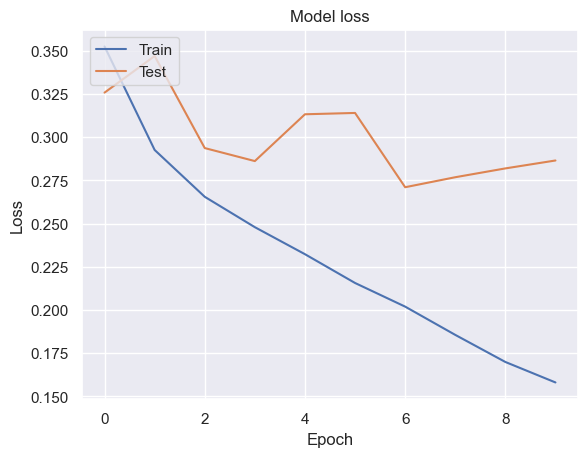

In [37]:
#plot the learning curves (Train loss, and Val loss)
plt.plot(history3.history['loss']) 
plt.plot(history3.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [40]:
model3.save('my_model19.h5', save_format = 'h5')

D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 3)                 771       
                                                                 
Total params: 20156483 (76.89 MB)
Trainable params: 132099 (516.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________
